In [ ]:
!pip install tensorflow==1.14.0

     |████████████████████████████████| 109.2MB 48kB/s 
     |████████████████████████████████| 3.2MB 39.8MB/s 
     |████████████████████████████████| 491kB 45.6MB/s 
  Found existing installation: tensorboard 2.2.1
    Uninstalling tensorboard-2.2.1:
      Successfully uninstalled tensorboard-2.2.1
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: tensorflow 2.2.0
    Uninstalling tensorflow-2.2.0:
      Successfully uninstalled tensorflow-2.2.0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import re

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a

In [ ]:
df = pd.read_json('Sarcasm_Headlines_Dataset.json', lines=True)
df.head(10)

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0
5,https://www.huffingtonpost.com/entry/advancing...,advancing the world's women,0
6,https://www.huffingtonpost.com/entry/how-meat-...,the fascinating case for eating lab-grown meat,0
7,https://www.huffingtonpost.com/entry/boxed-col...,"this ceo will send your kids to school, if you...",0
8,https://politics.theonion.com/top-snake-handle...,top snake handler leaves sinking huckabee camp...,1
9,https://www.huffingtonpost.com/entry/fridays-m...,friday's morning email: inside trump's presser...,0


In [ ]:
df = df[['headline','is_sarcastic']]
df.head()

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0


Text(0.5, 1.0, 'Sarcasm vs Non-sarcasm')

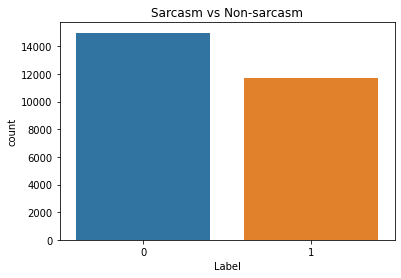

In [ ]:
sns.countplot(df.is_sarcastic)
plt.xlabel('Label')
plt.title('Sarcasm vs Non-sarcasm')

In [ ]:
df['headline'] = df['headline'].apply(lambda x: x.lower())
df['headline'] = df['headline'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))

In [ ]:
for idx,row in df.iterrows():
    row[0] = row[0].replace('rt',' ')

max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(df['headline'].values)
X = tokenizer.texts_to_sequences(df['headline'].values)
X = pad_sequences(X)

In [ ]:
Y = pd.get_dummies(df['is_sarcastic']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(17895, 29) (17895, 2)
(8814, 29) (8814, 2)


In [ ]:
embed_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])

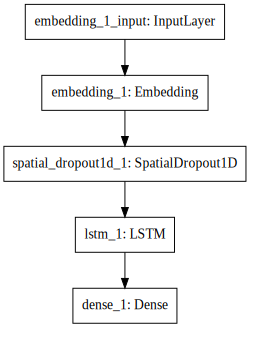

In [ ]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model,dpi=70).create(prog='dot', format='svg'))

In [ ]:

batch_size = 32
history = model.fit(X_train, Y_train, epochs = 25, batch_size=batch_size, verbose = 2)


Epoch 1/25
 - 52s - loss: 0.4494 - accuracy: 0.7823
Epoch 2/25
 - 50s - loss: 0.3376 - accuracy: 0.8532
Epoch 3/25
 - 49s - loss: 0.2994 - accuracy: 0.8715
Epoch 4/25
 - 49s - loss: 0.2743 - accuracy: 0.8832
Epoch 5/25
 - 49s - loss: 0.2552 - accuracy: 0.8936
Epoch 6/25
 - 49s - loss: 0.2375 - accuracy: 0.9022
Epoch 7/25
 - 48s - loss: 0.2211 - accuracy: 0.9082
Epoch 8/25
 - 49s - loss: 0.2054 - accuracy: 0.9129
Epoch 9/25
 - 49s - loss: 0.1901 - accuracy: 0.9214
Epoch 10/25
 - 49s - loss: 0.1737 - accuracy: 0.9271
Epoch 11/25
 - 49s - loss: 0.1603 - accuracy: 0.9360
Epoch 12/25
 - 49s - loss: 0.1482 - accuracy: 0.9404
Epoch 13/25
 - 51s - loss: 0.1381 - accuracy: 0.9441
Epoch 14/25
 - 49s - loss: 0.1292 - accuracy: 0.9487
Epoch 15/25
 - 49s - loss: 0.1197 - accuracy: 0.9516
Epoch 16/25
 - 49s - loss: 0.1054 - accuracy: 0.9581
Epoch 17/25
 - 49s - loss: 0.0956 - accuracy: 0.9636
Epoch 18/25
 - 49s - loss: 0.0943 - accuracy: 0.9631
Epoch 19/25
 - 49s - loss: 0.0879 - accuracy: 0.9651
E

In [ ]:

validation_size = 1500

X_validate = X_test[-validation_size:]
Y_validate = Y_test[-validation_size:]
X_test = X_test[:-validation_size]
Y_test = Y_test[:-validation_size]
score,acc = model.evaluate(X_test, Y_test, verbose = 2, batch_size = batch_size)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))



score: 0.98
acc: 0.82
0.8154454827308655


In [ ]:
plt.plot(history.history[0.82])
#plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('model_accuracy.png')

plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('model_loss.png')

KeyError: ignored

In [ ]:
pos_cnt, neg_cnt, pos_correct, neg_correct = 0, 0, 0, 0
for x in range(len(X_validate)):

    result = model.predict(X_validate[x].reshape(1,X_test.shape[1]),batch_size=1,verbose = 2)[0]

    if np.argmax(result) == np.argmax(Y_validate[x]):
        if np.argmax(Y_validate[x]) == 0:
            neg_correct += 1
        else:
            pos_correct += 1

    if np.argmax(Y_validate[x]) == 0:
        neg_cnt += 1
    else:
        pos_cnt += 1



print("Sarcasm_acc", pos_correct/pos_cnt*100, "%")
print("Non-Sarcasm_acc", neg_correct/neg_cnt*100, "%")

Sarcasm_acc 76.77224736048267 %
Non-Sarcasm_acc 84.82676224611708 %


In [ ]:
headline=[]
choice='Y'
print("Welcome to Sarcasm detector")
while (choice=='Y' or choice=='y' or choice=='Yes' or choice=='yes'):
  headline = input("Enter the statement to detect: ")
  headline = tokenizer.texts_to_sequences(headline)
  headline = pad_sequences(headline, maxlen=29, dtype='int32', value=0)

  sentiment = model.predict(headline,batch_size=1,verbose = 2)[0]
  if(np.argmax(sentiment) == 0):
      print("The entered statement is Non-Sarcastic")
  elif (np.argmax(sentiment) == 1):
      print("The entered statement is Sarcastic")
  choice=input("Do you want to enter another statement?")
  if (choice=='N' or choice=='n' or choice=='No' or choice=='no' or choice=='NO'):
    break



Welcome to Sarcasm detector


KeyboardInterrupt: ignored

In [ ]:
headline=[]
choice='Y'
print("Welcome to Sarcasm detector")
while (choice=='Y' or choice=='y' or choice=='Yes' or choice=='yes'):
  headline = input("Enter the statement to detect: ")
  headline = tokenizer.texts_to_sequences(headline)
  headline = pad_sequences(headline, maxlen=29, dtype='int32', value=0)

  sentiment = model.predict(headline,batch_size=1,verbose = 2)[0]
  if(np.argmax(sentiment) == 0):
      print("The entered statement is Non-Sarcastic")
  elif (np.argmax(sentiment) == 1):
      print("The entered statement is Sarcastic")
  choice=input("Do you want to enter another statement?")
  if (choice=='N' or choice=='n' or choice=='No' or choice=='no' or choice=='NO'):
    break

In [ ]:
headline=[]
choice='Y'
print("Welcome to Sarcasm detector")
while (choice=='Y' or choice=='y' or choice=='Yes' or choice=='yes'):
  headline = input("Enter the statement to detect: ")
  headline = tokenizer.texts_to_sequences(headline)
  headline = pad_sequences(headline, maxlen=29, dtype='int32', value=0)

  sentiment = model.predict(headline,batch_size=1,verbose = 2)[0]
  if(np.argmax(sentiment) == 0):
      print("The entered statement is Non-Sarcastic")
  elif (np.argmax(sentiment) == 1):
      print("The entered statement is Sarcastic")
  choice=input("Do you want to enter another statement?")
  if (choice=='N' or choice=='n' or choice=='No' or choice=='no' or choice=='NO'):
    break